In [72]:
%matplotlib notebook
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
os.chdir("D:\Documents\dataset(dell)\DGA_ecommerce_casestudy")

In [12]:
df_or = pd.read_csv("orders_dataset.csv")
df_cu = pd.read_csv("customers_dataset.csv")

In [13]:
df_cu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
customer_id                 99441 non-null object
customer_unique_id          99441 non-null object
customer_zip_code_prefix    99441 non-null int64
customer_city               99441 non-null object
customer_state              99441 non-null object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [16]:
df_cu[df_cu.duplicated(['customer_id'])]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


In [27]:
#since no duplicated customer_id tuples are there
#joining customer and order dataset on customer id
df = pd.merge(df_or,df_cu,on = 'customer_id', how = 'inner')

In [28]:
df = df[(df['order_status'] == 'delivered')]

In [29]:
df.isnull().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
customer_unique_id                0
customer_zip_code_prefix          0
customer_city                     0
customer_state                    0
dtype: int64

In [32]:
df = df.filter(['customer_city'])

In [53]:
results = df['customer_city'].value_counts()

In [54]:
results = results.head(10)

<IPython.core.display.Javascript object>


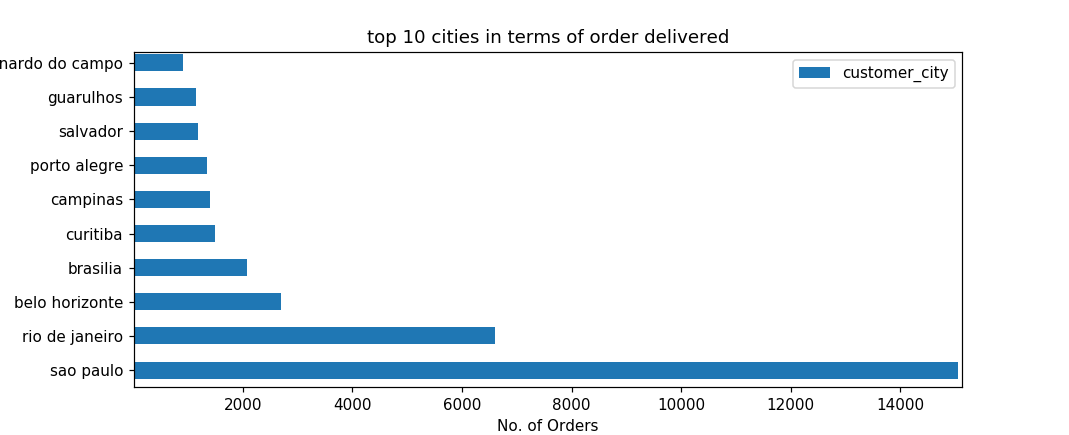

In [74]:
results.plot(kind = 'barh')
plt.title("top 10 cities in terms of order delivered")
plt.ylabel("CITIES")
plt.xlabel("No. of Orders")
plt.show()

In [51]:
results = pd.DataFrame(results,columns = ['city','count of Orders'])

In [60]:
results = pd.DataFrame(results)


In [63]:
results.index.name = 'customer_city'

In [65]:
results.rename(columns={"customer_city": "count"})

,count
customer_city,
sao paulo,15045
rio de janeiro,6601
belo horizonte,2697
brasilia,2071
curitiba,1489
campinas,1406
porto alegre,1342
salvador,1188
guarulhos,1144


In [70]:
plt.rcParams["figure.figsize"] = (20,10)